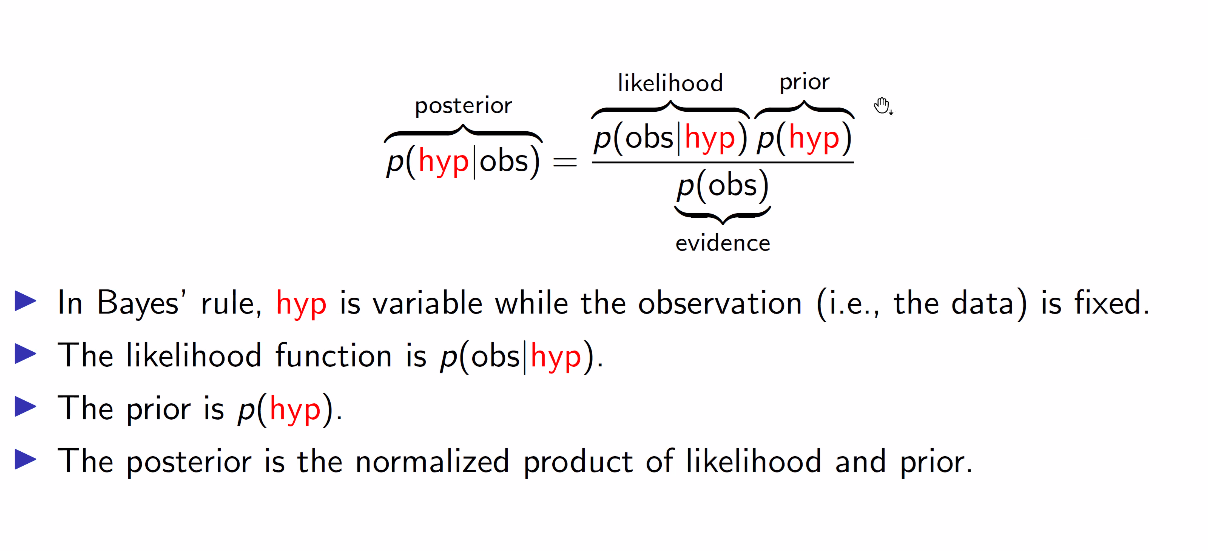

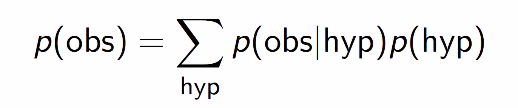

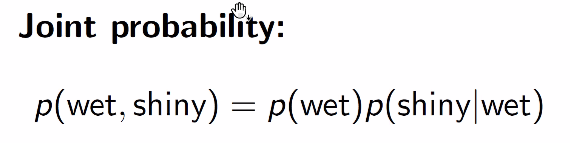

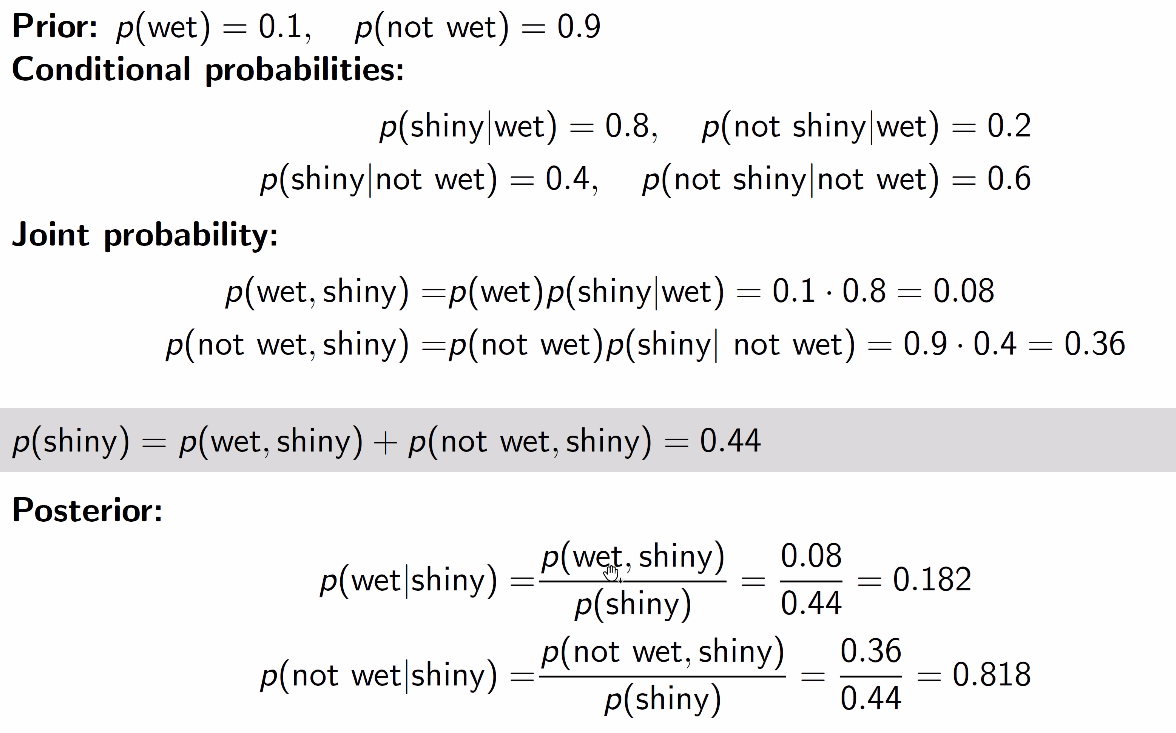

In [10]:
from IPython.display import Image
image_path = [
    'images/Screenshot from 2024-01-15 15-19-09.png',
    'images/Screenshotfrom2024-01-1710-20-06.png',
    'images/Screenshot from 2024-01-17 10-33-07.png',
    'images/Screenshot from 2024-01-17 10-37-04.png',
]
for image in image_path:
    display(Image(filename=image))


### cognition: posterior probability + possible loss and gain -> action

### Exercise 1.1: A Bayesian explanation of motion sickness

> **Motivation:** In this exercise, we will build a generative model and perform Bayesian inference to "explain" the phenomenon of motion sickness. This will show you how to think in terms of Bayesian inference in a perceptual scenario, and you will apply Bayes' rule with discrete probabilities.

Experimental psychologist Michel Treisman has tried to explain motion sickness in the context of evolution (Michel Treisman (1977), [*Motion sickness: an evolutionary hypothesis*, Science 197, 493-495](https://www.science.org/doi/10.1126/science.301659)). During the millions of years over which the human brain evolved, accidentally eating toxic food was a real possibility, and that could cause hallucinations. Perhaps, our modern brain still uses prior probabilities genetically passed on from those days; those would not be based on our personal experience, but on our ancestors’! This is a fascinating, though only weakly tested theory. Here,
we do not delve into the merits of the theory but take it as an example to cast as a form of Bayesian inference. 

Suppose you are standing in a windowless room on a ship at sea. Your brain has two sets of sensory observations: visual
observations and [vestibular](https://en.wikipedia.org/wiki/Vestibular_system) observations from your inner ear. Your observation $\text{obs}$ is that the visual input is still (nothing is moving), but the vestibular sense is sensing strong movement.

Assume that the brain considers three scenarios (hypotheses) for what may cause these observations:

- **Scenario 1 ($H_1$):** The room is not moving.
- **Scenario 2 ($H_2$):** The room is moving.
- **Scenario 3 ($H_3$):** You are hallucinating (e.g., because you ingested toxins).

Now fill in a simple generative model (hypotesis -> observation) as follows:
- a. Assigning prior probabilities to each state $H_1$, $H_2$, $H_3$ (plot a histogram given the provided function).
- b. Assign conditional probabilities (or likelihoods) of your specific observations $\text{obs}$ given each state. 
- c. Perform Bayesian inference to compute the posterior for the generative model you built. See how the posterior might change, depending on your choice of prior and likelihoods.
- d. How does Treisman's explanation for motion sickness fit in all this - why you might vomit in this situation?

*Hints*:
- For the prior over these hypotheses, consider that in prehistory, surroundings would almost never move. Once in a while, a person might accidentally ingest toxins. Assume that your innate prior probabilities are based on these prehistoric frequencies of events (i.e., make up some plausible numbers).
- For the conditional probabilities, note that in the windowless room on the ship, there is a big discrepancy between your visual and vestibular observations, so the current $\text{obs}$ are very unlikely under $H_1$.

a) Prior probabilities


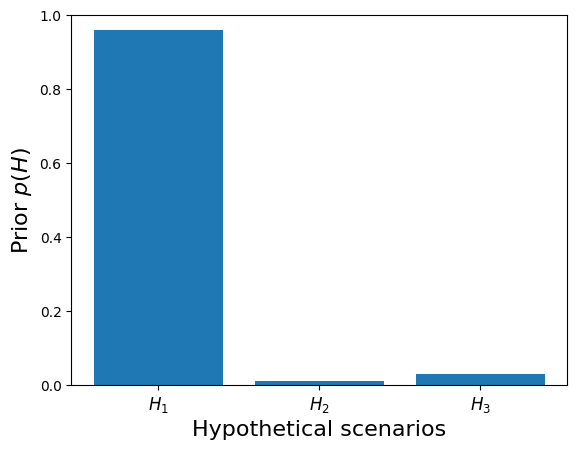

b) Likelihood function


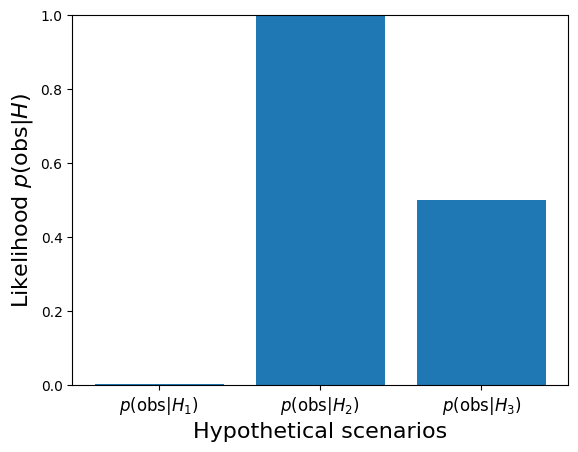

c) Posterior


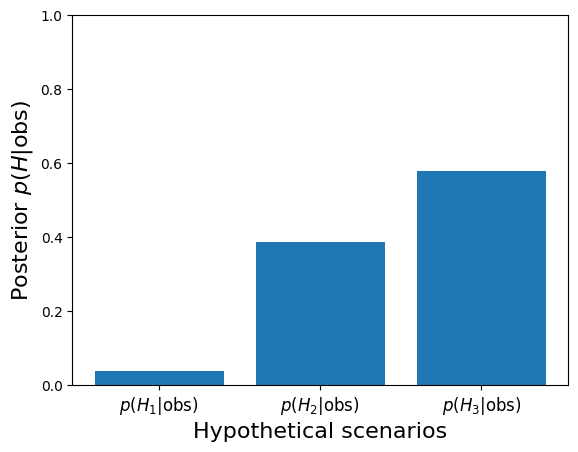

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = (0,1,2)

def plot_diagram(x,y,xticks,ylabel,fontsize=16,tickfontsize=12):
    """Plot histogram."""
    plt.bar(x, y)
    plt.ylim([0, 1])
    plt.xticks(x, xticks, fontsize=tickfontsize)
    plt.xlabel('Hypothetical scenarios', fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.show()
    
####################################################

print('a) Prior probabilities')
prior = np.array((0.96,0.01,0.03)) # Write in here your probabilities
plot_diagram(x, prior, xticks=['$H_1$', '$H_2$', '$H_3$'], ylabel='Prior $p(H)$')

####################################################

print('b) Likelihood function')
likelihood = np.array((0.001,0.999,0.5)) # Write here your likelihoods (does it need to sum to 1?)
plot_diagram(x, likelihood, xticks=['$p($obs$|H_1)$', '$p($obs$|H_2)$', '$p($obs$|H_3)$'], ylabel='Likelihood $p($obs$|H)$')

####################################################

print('c) Posterior')

# Compute here the posterior by multiplying prior and likelihood
# and then normalize it

posterior = prior * likelihood
posterior = posterior / np.sum(posterior)
plot_diagram(x, posterior, xticks=['$p(H_1|$obs$)$', '$p(H_2|$obs$)$', '$p(H_3|$obs$)$'], ylabel='Posterior $p(H|$obs$)$')